In [82]:
from load_covid_data import load_covid_data
import numpy as np
from sklearn.neural_network import MLPClassifier, MLPRegressor
from accuracy_score import accuracy_score
from sklearn.model_selection import train_test_split
from GridSearch import *
import pandas as pd

In [4]:

# Loading covid dataset
headers, X, Y = load_covid_data()
headers = np.delete(headers, 4)

M = 10000 #chosen number of data points
#n = len(Y)
#m = int(n/M)
#random_index = np.random.randint(m)*M   
#new_X = X[random_index:random_index+M]
#new_Y = Y[random_index:random_index+M]

new_X = X[0:M]
new_Y = Y[0:M]


X_train, X_test, Y_train, Y_test = train_test_split(new_X, new_Y, test_size = 0.25)

https://scikit-learn.org/stable/modules/neural_networks_supervised.html

Hyper parameters for model:
(hidden_layer_sizes: Any = (100, ), activation: str = "relu", *, solver: str = "adam", alpha: float = 0.0001, batch_size: str = "auto", learning_rate: str = "constant", learning_rate_init: float = 0.001, power_t: float = 0.5, max_iter: int = 200, shuffle: bool = True, random_state: Any | None = None, tol: float = 0.0001, verbose: bool = False, warm_start: bool = False, momentum: float = 0.9, nesterovs_momentum: bool = True, early_stopping: bool = False, validation_fraction: float = 0.1, beta_1: float = 0.9, beta_2: float = 0.999, epsilon: float = 1e-8, n_iter_no_change: int = 10, max_fun: int = 15000) -> None

Relevant for project are: alpha, batch_size, learning_rate_init, momentum
max_iter for epoch plot (if using adam solver)
Alpha is for L2 regularization
Might want to change learning_rate from constant

activation functions we use: relu, tanh, logistic (sigmoid)


In [21]:

layers = [18,15,12,8]
model = MLPClassifier(hidden_layer_sizes=layers, activation="relu", max_iter=500, alpha=1.0,)
model.fit(X_train, Y_train)

MLPClassifier(alpha=1.0, hidden_layer_sizes=[18, 15, 12, 8], max_iter=500)

In [22]:

Y_pred = model.predict(X_test)
print(accuracy_score(Y_pred, Y_test))

[[2026  157]
 [ 104  213]]
0.8956


alpha:1e-05, momentum :1e-06 gives accuracy 0.8988
alpha:1e-05, momentum :1e-05 gives accuracy 0.9048
alpha:1e-05, momentum :0.0001 gives accuracy 0.8952
alpha:1e-05, momentum :0.001 gives accuracy 0.8948
alpha:1e-05, momentum :0.01 gives accuracy 0.8864
alpha:1e-05, momentum :0.1 gives accuracy 0.9036
alpha:1e-05, momentum :1.0 gives accuracy 0.9024
alpha:0.0001, momentum :1e-06 gives accuracy 0.9036
alpha:0.0001, momentum :1e-05 gives accuracy 0.9068
alpha:0.0001, momentum :0.0001 gives accuracy 0.8904
alpha:0.0001, momentum :0.001 gives accuracy 0.9092
alpha:0.0001, momentum :0.01 gives accuracy 0.8972
alpha:0.0001, momentum :0.1 gives accuracy 0.8944
alpha:0.0001, momentum :1.0 gives accuracy 0.9012
alpha:0.001, momentum :1e-06 gives accuracy 0.9
alpha:0.001, momentum :1e-05 gives accuracy 0.896
alpha:0.001, momentum :0.0001 gives accuracy 0.9052
alpha:0.001, momentum :0.001 gives accuracy 0.894
alpha:0.001, momentum :0.01 gives accuracy 0.908
alpha:0.001, momentum :0.1 gives accur

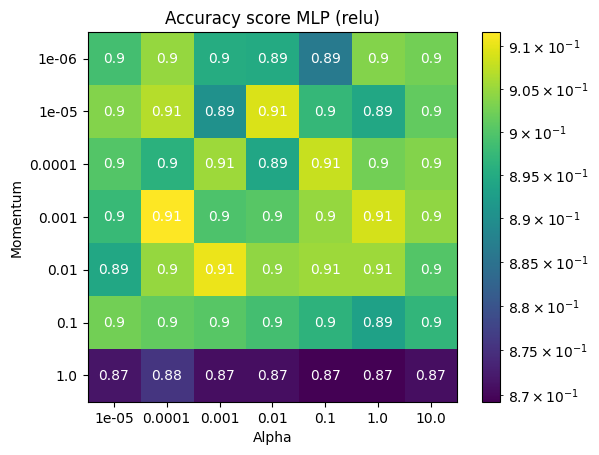

In [5]:
grid_search_hyperparameters_MLP(X_train, X_test, Y_train, Y_test, "Accuracy score MLP (relu)", func="relu", verbose=True)

alpha:1e-05, momentum :1e-06 gives accuracy 0.91
alpha:1e-05, momentum :1e-05 gives accuracy 0.908
alpha:1e-05, momentum :0.0001 gives accuracy 0.9092
alpha:1e-05, momentum :0.001 gives accuracy 0.91
alpha:1e-05, momentum :0.01 gives accuracy 0.906
alpha:1e-05, momentum :0.1 gives accuracy 0.9052
alpha:1e-05, momentum :1.0 gives accuracy 0.912
alpha:0.0001, momentum :1e-06 gives accuracy 0.908
alpha:0.0001, momentum :1e-05 gives accuracy 0.9072
alpha:0.0001, momentum :0.0001 gives accuracy 0.8888
alpha:0.0001, momentum :0.001 gives accuracy 0.9068
alpha:0.0001, momentum :0.01 gives accuracy 0.9096
alpha:0.0001, momentum :0.1 gives accuracy 0.9064
alpha:0.0001, momentum :1.0 gives accuracy 0.9048
alpha:0.001, momentum :1e-06 gives accuracy 0.904
alpha:0.001, momentum :1e-05 gives accuracy 0.9112
alpha:0.001, momentum :0.0001 gives accuracy 0.9104
alpha:0.001, momentum :0.001 gives accuracy 0.906
alpha:0.001, momentum :0.01 gives accuracy 0.9104
alpha:0.001, momentum :0.1 gives accuracy 

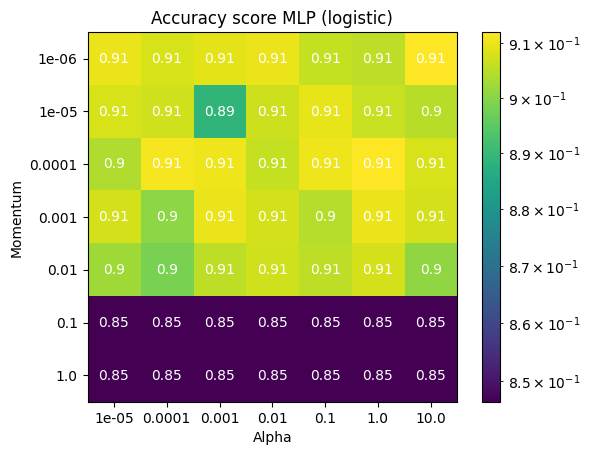

In [6]:
grid_search_hyperparameters_MLP(X_train, X_test, Y_train, Y_test, "Accuracy score MLP (logistic)", func="logistic", verbose=True)


alpha:1e-05, momentum :1e-06 gives accuracy 0.9072
alpha:1e-05, momentum :1e-05 gives accuracy 0.8992
alpha:1e-05, momentum :0.0001 gives accuracy 0.9016
alpha:1e-05, momentum :0.001 gives accuracy 0.9036
alpha:1e-05, momentum :0.01 gives accuracy 0.9024
alpha:1e-05, momentum :0.1 gives accuracy 0.9
alpha:1e-05, momentum :1.0 gives accuracy 0.9092
alpha:0.0001, momentum :1e-06 gives accuracy 0.9004
alpha:0.0001, momentum :1e-05 gives accuracy 0.9068
alpha:0.0001, momentum :0.0001 gives accuracy 0.9004
alpha:0.0001, momentum :0.001 gives accuracy 0.9096
alpha:0.0001, momentum :0.01 gives accuracy 0.902
alpha:0.0001, momentum :0.1 gives accuracy 0.8952
alpha:0.0001, momentum :1.0 gives accuracy 0.9012
alpha:0.001, momentum :1e-06 gives accuracy 0.9108
alpha:0.001, momentum :1e-05 gives accuracy 0.9044
alpha:0.001, momentum :0.0001 gives accuracy 0.9048
alpha:0.001, momentum :0.001 gives accuracy 0.902
alpha:0.001, momentum :0.01 gives accuracy 0.9032
alpha:0.001, momentum :0.1 gives accu

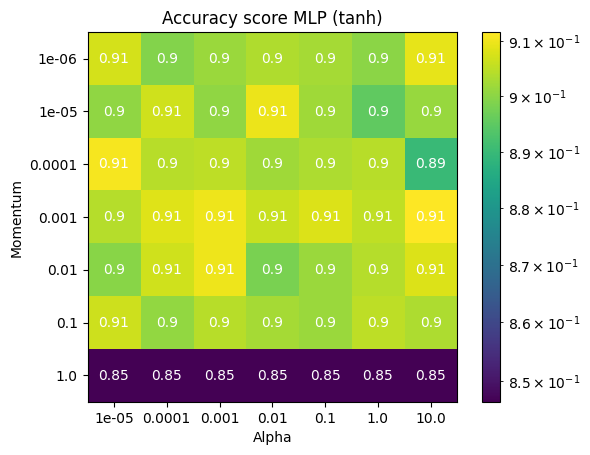

In [7]:
grid_search_hyperparameters_MLP(X_train, X_test, Y_train, Y_test, "Accuracy score MLP (tanh)", func="tanh", verbose=True)


In [8]:
model = MLPClassifier(activation="relu", max_iter=10000)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print(accuracy_score(Y_pred, Y_test))

model = MLPClassifier(activation="logistic", max_iter=10000)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print(accuracy_score(Y_pred, Y_test))

model = MLPClassifier(activation="tanh", max_iter=10000)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print(accuracy_score(Y_pred, Y_test))


[[2079  191]
 [  37  193]]
0.9088
[[2051  166]
 [  65  218]]
0.9076
[[2056  155]
 [  60  229]]
0.914


Now we do same for forest of trees method

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
forest = RandomForestClassifier(random_state=1)
forest.fit(X_train, Y_train)

RandomForestClassifier(random_state=1)

In [29]:
Y_pred = forest.predict(X_test)
print(accuracy_score(Y_test, Y_pred))
print("predicted chance of dying:",np.sum(Y_pred)/len(Y_pred))
print("Actual chance of dying (test set):",np.sum(Y_test)/len(Y_test))


[[1998  118]
 [ 142  242]]
0.896
predicted chance of dying: 0.144
Actual chance of dying (test set): 0.1536


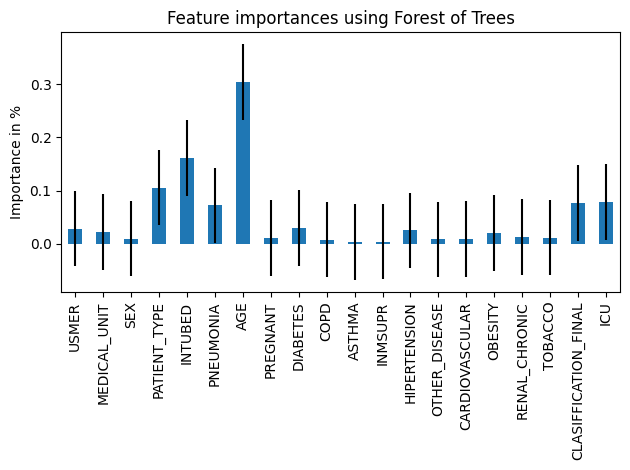

In [31]:
importances = forest.feature_importances_
std = np.std(importances)
forest_importances = pd.Series(importances, index=headers)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using Forest of Trees")
ax.set_ylabel("Importance in %")
fig.tight_layout()

Text(0.5, 0, 'Age')

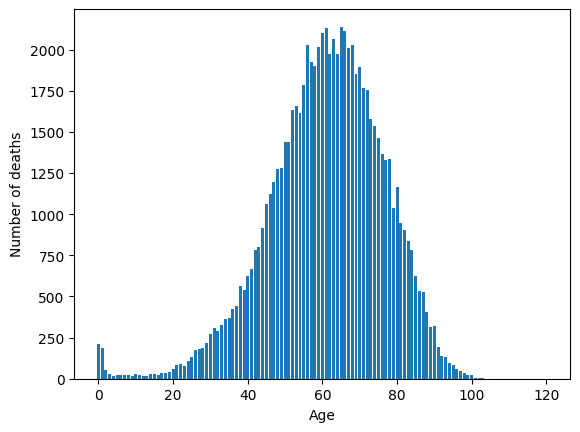

In [52]:
#Making histogram of amount of deaths given a certain age
Age = X[:,6]
deaths = {i:0 for i in np.unique(Age)}
for i in range(len(Y)):
    deaths[Age[i]] += Y[i]

plt.bar(range(len(deaths)), list(deaths.values()))
plt.ylabel("Number of deaths")
plt.xlabel("Age")

Text(0.5, 0, 'Age')

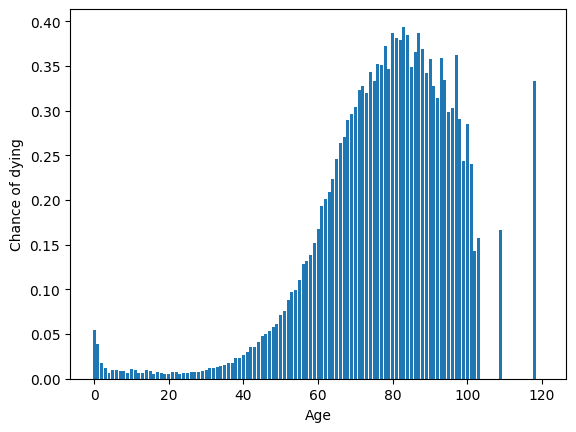

In [57]:
#Making histogram of chance of dying given a certain age
chance_dying = deaths.copy()
amount = {i:0 for i in np.unique(Age)}

for i in range(len(Y)):
    amount[Age[i]] += 1

for key in chance_dying:
    chance_dying[key] /= amount[key]

plt.bar(range(len(chance_dying)), list(chance_dying.values()))
plt.ylabel("Chance of dying")
plt.xlabel("Age")


In [78]:
#looking into chance of dying based on age 
##Note, not finished, need to figure out way to fix imbalanced data

Age_train = X_train[:,6].reshape(-1,1)
Age_test = X_test[:,6].reshape(-1,1)

model = MLPClassifier(activation="logistic", max_iter=10000)
model.fit(Age_train, Y_train)
YA_pred = model.predict(Age_test)
print(accuracy_score(YA_pred, Y_test))



[[2093  407]
 [   0    0]]
0.8372


In [69]:
forestAge = RandomForestClassifier(random_state=1)
forestAge.fit(Age_train, Y_train)
pred = forestAge.predict(Age_test)
accuracy_score(pred, Y_test)

[[2091  407]
 [   2    0]]


0.8364

Seems we arent able to classify based on just age. This makes sence since every percentage based on age is lower than 50, so
our classifier would not benefit from setting any given age as death.
We therefore try with regression.

In [66]:
#Test code, use later for removing features

A = [1,2,2,2,3,3,5,5]
A = np.array(A)
remove = np.where(A > 2)
A = np.delete(A, remove)
print(A)



[1 2 2 2]


In [124]:
def ChanceDying(X,Y):
    ages = np.unique(X)
    deaths = {i:0 for i in ages}
    numb = deaths.copy()
    for i in range(len(Y)):
        deaths[X[i]] += Y[i]
        numb[X[i]] += 1


    for key in deaths:
        if numb[key] > 0:
            deaths[key] /= numb[key] 
    
    return deaths 

def MakeArray(dict):
    length = len(dict)
    x_arr = np.zeros(length)
    y_arr = np.zeros(length)

    for i,key in enumerate(dict):
        x_arr[i] = key 
        y_arr[i] = dict[key]

    return x_arr, y_arr



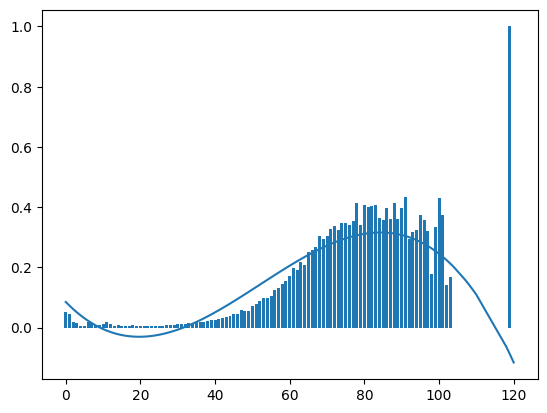

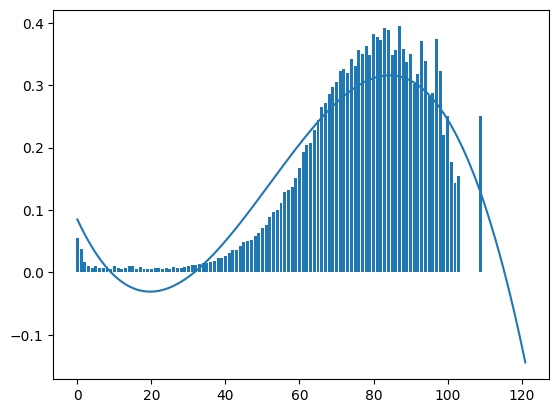

In [182]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

Age_train, Age_test, YA_train, YA_test = train_test_split(Age, Y, test_size=0.2)

deaths_train = ChanceDying(Age_train, YA_train)
probx_train, proby_train = MakeArray(deaths_train)

deaths_test = ChanceDying(Age_test, YA_test)
probx_test, proby_test = MakeArray(deaths_test)

lin = LinearRegression()
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(probx_train.reshape(-1,1))
lin.fit(X_poly, proby_train)

X_poly_test = poly.fit_transform(probx_test.reshape(-1,1))
plt.plot(probx_test, lin.predict(X_poly_test))

#plt.bar(probx_test, Y_pred)
plt.bar(probx_test, proby_test)
plt.show()

plt.bar(probx_train, proby_train)
plt.plot(probx_train, lin.predict(X_poly))

In [197]:
test = np.array([80])
pred = poly.fit_transform(test.reshape(-1,1))
print(lin.predict(pred))

[0.31117972]
